<a href="https://colab.research.google.com/github/UmarKhattab09/Deep-Learning/blob/main/DeepLearningANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
## Import some Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset=pd.read_csv('Churn_Modelling.csv')

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
### PROBLEM STATEMENT: Will the People leave the provided service or not
#Binary Classification Problem.

In [ ]:
### Divide The Dataset into the Dependent and Independent Features
##---> Rownumber,CustomerID,Surname is removed because They won't effect the ooutput that much

In [ ]:
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [ ]:
## Feature Engineering
geograghy=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
X=pd.concat([X,geograghy,gender],axis=1)

In [ ]:
X.drop(['Geography','Gender'],axis=1,inplace=True)


In [ ]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
#Create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout



In [ ]:
### let intialize the ANN
classifier = Sequential()


###----> Adding Input Layer
classifier.add(Dense(units=11,activation='relu'))


###---> Adding the Frist Hidden Layer
classifier.add(Dense(units=7,activation='relu'))


###---> Adding the Second Hidden Layer
classifier.add(Dense(units=6,activation='relu'))


###---> Adding the Output Layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
##----> Changing Learning Rate

# import tensorflow
# tensorflow.keras.optimizers.Adam(
#     learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
#     name='Adam', **kwargs
# )
# classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000) #--------> Will Run for 1000 EPOCHS

In [ ]:
#EARLY STOPPING
earlystoping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history=classifier.fit(X_train,y_train,epochs=1000,validation_split=0.2,callbacks=[earlystoping])

Epoch 1/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.6424 - loss: 0.6724 - val_accuracy: 0.7969 - val_loss: 0.4819
Epoch 2/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7868 - loss: 0.4770 - val_accuracy: 0.8000 - val_loss: 0.4491
Epoch 3/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8059 - loss: 0.4384 - val_accuracy: 0.8000 - val_loss: 0.4400
Epoch 4/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8070 - loss: 0.4240 - val_accuracy: 0.8019 - val_loss: 0.4348
Epoch 5/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8143 - loss: 0.4219 - val_accuracy: 0.8031 - val_loss: 0.4296
Epoch 6/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8181 - loss: 0.4168 - val_accuracy: 0.8100 - val_loss: 0.4243
Epoch 7/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8206 - loss: 0.4091 - val_accuracy: 0.8138 - val_loss: 0.4187
Epoch 8/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8298 - loss: 0.3887 

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

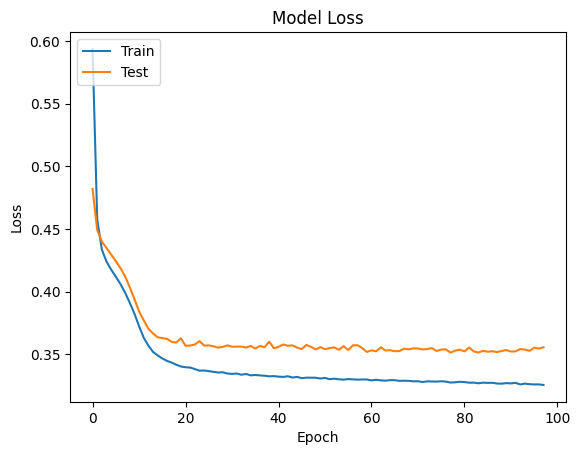

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

Text(0.5, 0, 'Epoch')

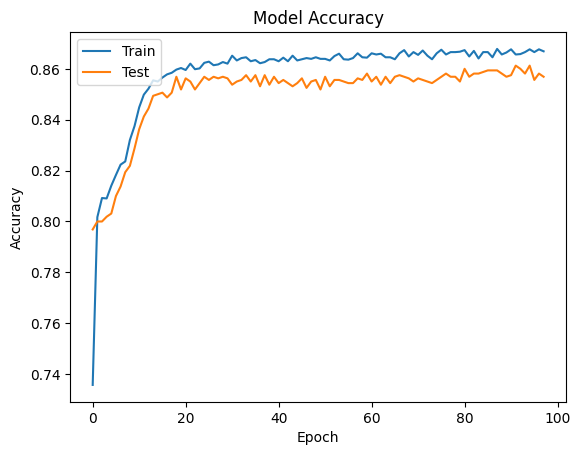

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='upper left')

plt.xlabel('Epoch')

In [ ]:
###PART 3 -MAKING PREDICTION
#predicting the test set results
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1504,   91],
       [ 191,  214]])

In [ ]:
##Calculate THE ACCURACY
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.859

In [ ]:
##get the weights
classifier.get_weights()

[array([[ 0.02561007,  0.0902122 ,  0.12211432,  0.29151383,  0.47288328,
          0.13401532, -0.24868621, -0.04453309,  0.3158851 ,  0.2385477 ,
         -0.17789839],
        [-0.8795902 ,  0.32700598, -0.1768702 , -0.34165516,  0.04927418,
         -0.6989116 , -0.39337027,  0.34910956, -0.26201287, -0.09406728,
          0.4787756 ],
        [ 0.03521847, -0.38713557, -0.08404525, -0.62609446, -0.48490113,
         -0.13102034,  0.0439375 ,  0.34102663,  0.03282987, -0.26207146,
          0.00974116],
        [ 0.2959356 ,  0.02796278,  0.37393403,  0.01746972,  0.30639538,
          0.12565896, -0.27952886,  0.10709374, -0.16762283,  0.21497752,
          0.04447362],
        [ 0.26478454,  0.5379289 ,  1.1911626 ,  0.4309827 , -0.4952196 ,
         -0.17706883,  0.392397  ,  0.34471458,  0.90793836,  0.6678542 ,
         -0.0514714 ],
        [ 0.03614661, -0.08568576, -0.03699625, -0.61697495, -0.23062824,
          0.25515518, -0.38136992,  0.14633065, -0.09892627, -0.0812056